In [1]:
import scipy
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mse(known_mse_fname, unknown_mse_fname, n_epoch, n_data, n_sensing):
    mse_known = np.load(known_mse_fname)
    mse_unknown = np.load(unknown_mse_fname)
    
    avg_known_sensing = np.zeros([1, n_sensing])
    avg_unknown_sensing = np.zeros([1, n_sensing])
    
    n_pts = n_epoch * n_data
    
    for n_psi in range(n_sensing):
        kn = mse_known[n_psi * n_pts : (n_psi + 1) * n_pts]
        unkn = mse_unknown[n_psi * n_pts : (n_psi + 1) * n_pts]

        avg_known_sensing[0, n_psi] = np.average(kn[-n_pts : ])
        avg_unknown_sensing[0, n_psi] = np.average(unkn[-n_pts : ])
    
    return avg_known_sensing, avg_unknown_sensing

In [3]:
def smooth_curve(x, y, smooth_factor):
    spline = interpolate.UnivariateSpline(x, y)
    spline.set_smoothing_factor(smooth_factor)
    return spline(x)

In [4]:
# sensing_ratio = [1] + list(np.arange(5, 55, 5))
sensing_ratio = 1 + np.arange(80)

n_sensing = len(sensing_ratio)

our_kn, our_ukn = get_mse('./Outputs/mse_known.npy', 
                          './Outputs/mse_unknown.npy', 
                          n_epoch = 30, n_data = 10, n_sensing = n_sensing)

eldar_chepuri_kn, eldar_chepuri_ukn = get_mse('./Outputs/eldar_chepuri_mse_known.npy', 
                                              './Outputs/eldar_chepuri_mse_unknown.npy',
                                              n_epoch = 100, n_data = 10, n_sensing = 80)

eldar_matic_kn, eldar_matic_ukn = get_mse('./Outputs/eldar_matic_mse_known.npy', 
                                          './Outputs/eldar_matic_mse_unknown.npy', 
                                          n_epoch = 100, n_data = 10, n_sensing = 80)

eldar_global_kn, eldar_global_ukn = get_mse('./Outputs/eldar_global_mse_known.npy', 
                                          './Outputs/eldar_global_mse_unknown.npy', 
                                          n_epoch = 100, n_data = 10, n_sensing = 80)

eldar_knn_kn, eldar_knn_ukn = get_mse('./Outputs/eldar_KNN_mse_known.npy', 
                                      './Outputs/eldar_KNN_mse_unknown.npy', 
                                      n_epoch = 100, n_data = 10, n_sensing = 80)

# eldar_chepuri_kn, eldar_chepuri_ukn = eldar_chepuri_kn[:, sensing_ratio], eldar_chepuri_ukn[:, sensing_ratio]
# eldar_matic_kn, eldar_matic_ukn = eldar_matic_kn[:, sensing_ratio], eldar_matic_ukn[:, sensing_ratio]
# eldar_global_kn, eldar_global_ukn = eldar_global_kn[:, sensing_ratio], eldar_global_ukn[:, sensing_ratio]
# eldar_knn_kn, eldar_knn_ukn = eldar_knn_kn[:, sensing_ratio], eldar_knn_ukn[:, sensing_ratio]

print(our_kn.shape)
print(eldar_knn_kn.shape)

(1, 80)
(1, 80)


In [5]:
legends = ["Proposed Model", "Eldar - Chepuri graph",
           "Eldar - Matic graph", "Eldar - GS graph", "Eldar - KNN graph"]

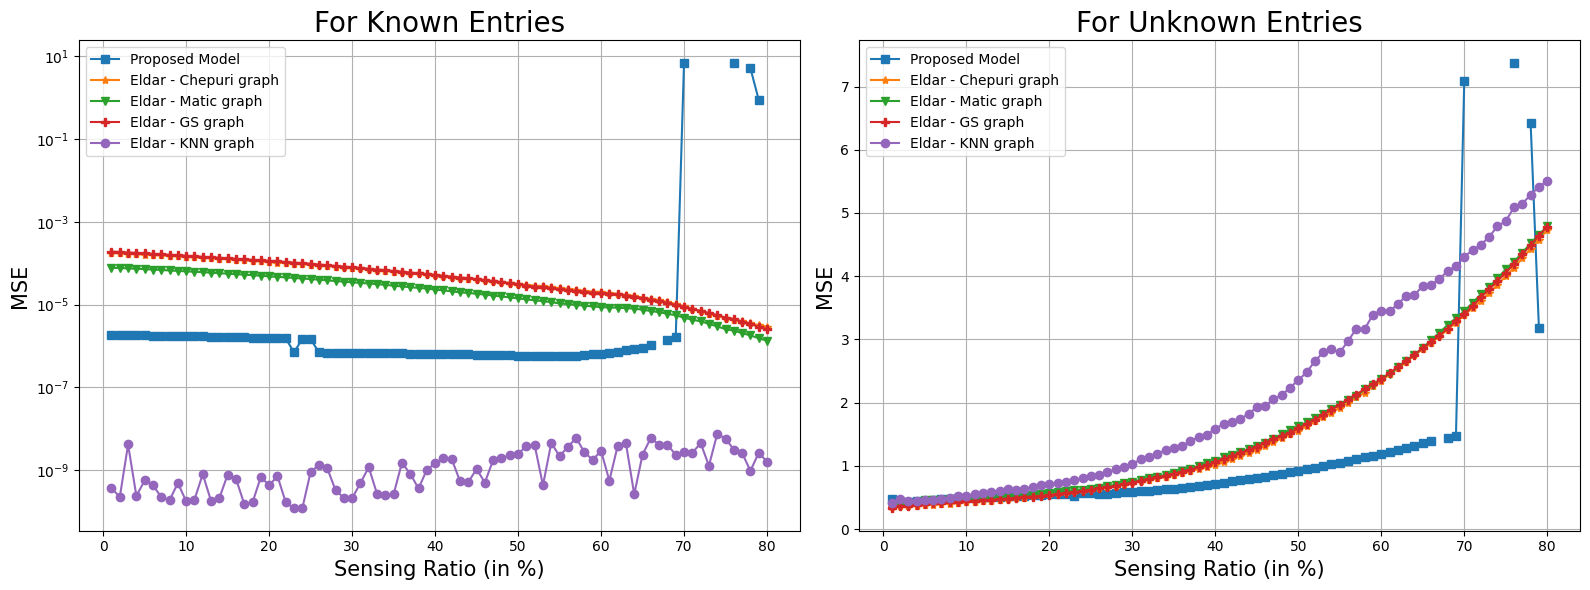

In [6]:
fig = plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)

plt.plot(sensing_ratio, our_kn[0, :], label = legends[0], marker = "s")
plt.plot(sensing_ratio, eldar_chepuri_kn[0, :], label = legends[1], marker = "*")
plt.plot(sensing_ratio, eldar_matic_kn[0, :], label = legends[2], marker = "v")
plt.plot(sensing_ratio, eldar_global_kn[0, :], label = legends[3], marker = "P")
plt.plot(sensing_ratio, eldar_knn_kn[0, :], label = legends[4], marker = "o")

plt.title("For Known Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)
plt.yscale("log")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(sensing_ratio, our_ukn[0,:], label = legends[0], marker = "s")
plt.plot(sensing_ratio, eldar_chepuri_ukn[0, :], label = legends[1], marker = "*")
plt.plot(sensing_ratio, eldar_matic_ukn[0, :], label = legends[2], marker = "v")
plt.plot(sensing_ratio, eldar_global_ukn[0, :], label = legends[3], marker = "P")
plt.plot(sensing_ratio, eldar_knn_ukn[0, :], label = legends[4], marker = "o")

plt.title("For Unknown Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

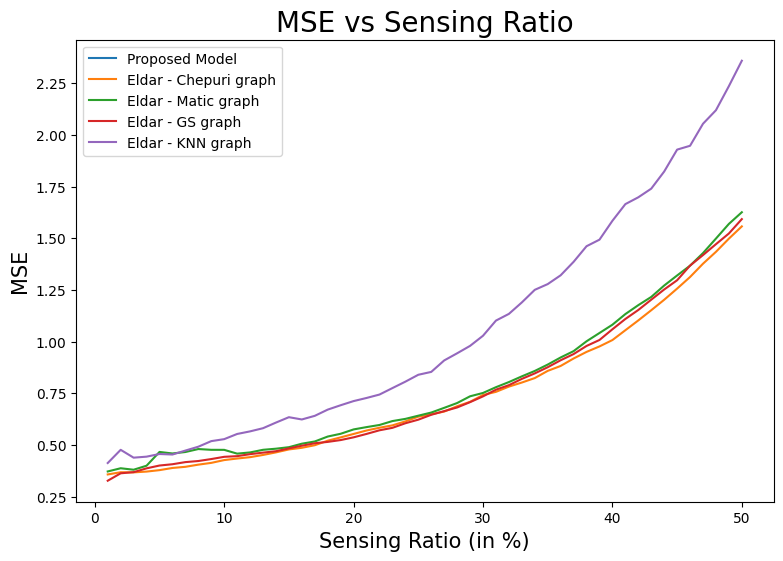

In [7]:
fig = plt.figure(figsize = [9, 6])

plot_sr = 50
sr = sensing_ratio[ : plot_sr]

smoothing_factor = 0

sm1 = smooth_curve(sensing_ratio, our_ukn[0, :], smoothing_factor)
sm2 = smooth_curve(sensing_ratio, eldar_chepuri_ukn[0, :], smoothing_factor)
sm3 = smooth_curve(sensing_ratio, eldar_matic_ukn[0, :], smoothing_factor)
sm4 = smooth_curve(sensing_ratio, eldar_global_ukn[0, :], smoothing_factor)
sm5 = smooth_curve(sensing_ratio, eldar_knn_ukn[0], smoothing_factor)

plt.plot(sr, sm1[ : plot_sr], label = legends[0])
plt.plot(sr, sm2[ : plot_sr], label = legends[1])
plt.plot(sr, sm3[ : plot_sr], label = legends[2])
plt.plot(sr, sm4[ : plot_sr], label = legends[3])
plt.plot(sr, sm5[ : plot_sr], label = legends[4])

plt.title("MSE vs Sensing Ratio", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)

plt.legend()

# plt.savefig("./../Plots/brittney_mse_vs_sr_unknown.pdf")

plt.show()